In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

In [21]:
data = pd.read_csv('C:/Users/Len/Downloads/DATA-ANALYSYS_2-master (1)/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv', delimiter=',')
data = data.fillna(0)
data.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [22]:
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    22223 non-null object
DemGender          22223 non-null object
DemReg             22223 non-null object
DemTVReg           22223 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [30]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data['TargetBuy']
y=y.astype('int')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [41]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree = tree.fit(X_train, y_train)

In [42]:
print(tree.score(X_train, y_train)) 
print(tree.score(X_test, y_test))

0.793455901259964
0.7927103644817759


In [43]:
y_pred = tree.predict(X_test)
confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))

0.7927103644817759
0.4484029484029484
0.6013179571663921
0.513722730471499
0.6761760723360247
0.3922375851922515
0.38553528116023994


In [45]:
from sklearn.metrics import auc
pred_prob = tree.predict_proba(X_test)
pred = pred_prob[:, -1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

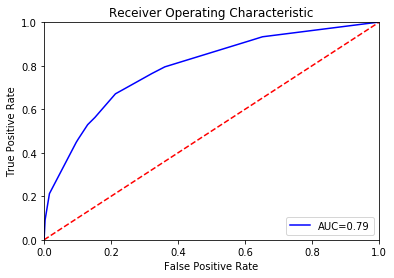

In [47]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()